# MODELS 101

In [66]:
## standard and modeling imports

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from Modules import *
sns.set()
%matplotlib inline
import imblearn
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score,  KFold
from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [4]:
# read the csv & clean up some of the unusual values
df, y = read_data('../default_of_credit_card_clients.xls')
df = proc_cat_df(df)

df.head().T

,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
AGE,24,26,34,37,57
PAY_1,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0
PAY_5,-2,0,0,0,0
PAY_6,-2,2,0,0,0
BILL_AMT1,3913,2682,29239,46990,8617
BILL_AMT2,3102,1725,14027,48233,5670


In [5]:
X = df.drop(columns = 'Y')
y = df['Y']

In [6]:
df.describe()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,Y,SEX_Female,SEX_Male,EDUCATION_Graduate School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Non-married
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,...,4799.387633,5215.502567,0.221200,0.603733,0.396267,0.352833,0.179500,0.467667,0.455300,0.544700
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,...,15278.305679,17777.465775,0.415062,0.489129,0.489129,0.477859,0.383777,0.498962,0.498006,0.498006
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,...,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,...,1500.000000,1500.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,...,4031.500000,4000.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
##splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 2019, test_size = .2)

In [8]:
#create  oversampled data to train on
oversampler = SMOTE(random_state = 2019)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

In [9]:
#Put the oversampled data back into a dataframe
X_train_oversampled = pd.DataFrame(X_train_oversampled, columns = X_train.columns)
y_train_oversampled = pd.Series(y_train_oversampled)

In [10]:
#check the size of the data
print("X_train_oversampled", X_train_oversampled.shape)
print("X_test",X_test.shape)
print("y_train_oversampled",y_train_oversampled.shape)
print("y_test",y_test.shape)

X_train_oversampled (37308, 27)
X_test (6000, 27)
y_train_oversampled (37308,)
y_test (6000,)


# Logistic Regression 

In [20]:
clfLR = LogisticRegression(solver = 'lbfgs',
                           max_iter = 500,
                          random_state = 2019)
clfLR.fit(X_train_oversampled,y_train_oversampled)

predLR = clfLR.predict(X_test)

In [21]:
# Cross Validation
cross_val_score_LR = cross_val_score(clfLR, X_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_LR.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predLR).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predLR).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predLR).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predLR).round(2))

cross_val_score:  0.78
precision score is  0.29
recall_score is  0.7155
f1 score is  0.409
ROC AUC is  0.61


In [22]:
#Use 5-fold cross validation to see how well the classfier you built is doing on test data.

kfold = KFold(n_splits=5, random_state=2019)
results = cross_val_score(clfLR, X_test, y_test, cv=kfold, scoring = 'f1')

print(f"5-fold cross-validation results: {np.mean(results)}")

C:\Users\brown\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\brown\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\brown\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


5-fold cross-validation results: 0.0


# SVC

In [23]:
clfSVC = SVC(kernel = 'rbf',
             gamma = 'scale',
                random_state = 2019)

clfSVC.fit(X_train_oversampled,y_train_oversampled)

predSVC = clfSVC.predict(X_test)

In [24]:
# Cross Validation
cross_val_score_SVC = cross_val_score(clfSVC, X_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_SVC.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predSVC).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predSVC).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predSVC).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predSVC).round(2))

cross_val_score:  0.78
precision score is  0.29
recall_score is  0.6915
f1 score is  0.404
ROC AUC is  0.61


In [25]:
#Use 5-fold cross validation to see how well the classfier you built is doing on test data.

kfold = KFold(n_splits=5, random_state=2019)
results = cross_val_score(p, X_test, y_test, cv=kfold, scoring = 'f1')

print(f"5-fold cross-validation results: {np.mean(results)}")

NameError: name 'p' is not defined

# Kneighbours


In [26]:
clfKNN = KNeighborsClassifier(n_neighbors = 3)
k = clfKNN.fit(X_train_oversampled,y_train_oversampled)

predKNN = clfKNN.predict(X_test)

In [27]:
# Cross Validation
cross_val_score_KNN = cross_val_score(clfKNN, X_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_KNN.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predKNN).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predKNN).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predKNN).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predKNN).round(2))

cross_val_score:  0.74
precision score is  0.27
recall_score is  0.4705
f1 score is  0.344
ROC AUC is  0.56


In [28]:
#Use 5-fold cross validation to see how well the classfier you built is doing on test data.

kfold = KFold(n_splits=5, random_state=2019)
results = cross_val_score(k, X_test, y_test, cv=kfold, scoring = 'f1')

print(f"5-fold cross-validation results: {np.mean(results)}")

5-fold cross-validation results: 0.2665079757930276


# Random Forest Classifier

In [29]:
clfRF = RandomForestClassifier(criterion = 'gini',
                              n_estimators = 100,
                              verbose = False,
                              random_state = 0)

r = clfRF.fit(X_train_oversampled,y_train_oversampled)

predRF = clfRF.predict(X_test)

In [30]:
# Cross Validation
cross_val_score_RF = cross_val_score(clfRF, X_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_RF.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predRF).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predRF).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predRF).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predRF).round(2))

cross_val_score:  0.82
precision score is  0.59
recall_score is  0.4488
f1 score is  0.511
ROC AUC is  0.68


In [31]:
#Use 5-fold cross validation to see how well the classfier you built is doing on test data.

kfold = KFold(n_splits=5, random_state=2019)
results = cross_val_score(r, X_test, y_test, cv=kfold, scoring = 'f1')

print(f"5-fold cross-validation results: {np.mean(results)}")

5-fold cross-validation results: 0.4717615268280517


# light gbm 

In [32]:
clfLGB = LGBMClassifier(n_estimators = 100,
                           learning_rate = .2,
                           random_state = 0)

g = clfLGB.fit(X_train_oversampled,y_train_oversampled)

predLGB = g.predict(X_test)

In [33]:
# Cross Validation
cross_val_score_LGB = cross_val_score(clfLGB, X_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_LGB.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predLGB).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predLGB).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predLGB).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predLGB).round(2))

cross_val_score:  0.81
precision score is  0.64
recall_score is  0.4047
f1 score is  0.495
ROC AUC is  0.67


In [34]:
#Use 5-fold cross validation to see how well the classfier you built is doing on test data.

kfold = KFold(n_splits=5, random_state=2019)
results = cross_val_score(g, X_test, y_test, cv=kfold, scoring = 'f1')

print(f"5-fold cross-validation results: {np.mean(results)}")

5-fold cross-validation results: 0.47132171946607493


# Cat Boost Classifier

https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html

In [35]:
clfCB = CatBoostClassifier(iterations = 100,
                           learning_rate = .2,
                           depth = 5,
                           eval_metric = 'AUC',
                           random_seed = 0)

clfCB.fit(X_train_oversampled,y_train_oversampled)

predCB = clfCB.predict(X_test)

0:	total: 128ms	remaining: 12.6s
1:	total: 194ms	remaining: 9.51s
2:	total: 259ms	remaining: 8.37s
3:	total: 328ms	remaining: 7.88s
4:	total: 402ms	remaining: 7.64s
5:	total: 472ms	remaining: 7.39s
6:	total: 541ms	remaining: 7.18s
7:	total: 619ms	remaining: 7.12s
8:	total: 688ms	remaining: 6.95s
9:	total: 758ms	remaining: 6.82s
10:	total: 839ms	remaining: 6.79s
11:	total: 915ms	remaining: 6.71s
12:	total: 1.01s	remaining: 6.74s
13:	total: 1.1s	remaining: 6.77s
14:	total: 1.19s	remaining: 6.73s
15:	total: 1.28s	remaining: 6.75s
16:	total: 1.38s	remaining: 6.72s
17:	total: 1.48s	remaining: 6.73s
18:	total: 1.55s	remaining: 6.63s
19:	total: 1.64s	remaining: 6.58s
20:	total: 1.72s	remaining: 6.46s
21:	total: 1.79s	remaining: 6.33s
22:	total: 1.88s	remaining: 6.29s
23:	total: 1.96s	remaining: 6.22s
24:	total: 2.05s	remaining: 6.16s
25:	total: 2.13s	remaining: 6.07s
26:	total: 2.21s	remaining: 5.97s
27:	total: 2.29s	remaining: 5.89s
28:	total: 2.38s	remaining: 5.82s
29:	total: 2.46s	remainin

In [36]:
# Cross Validation
cross_val_score_LGB = cross_val_score(clfCB, X_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_LGB.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, predCB).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, predCB).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, predCB).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, predCB).round(2))

0:	total: 42ms	remaining: 4.16s
1:	total: 83.3ms	remaining: 4.08s
2:	total: 126ms	remaining: 4.07s
3:	total: 173ms	remaining: 4.14s
4:	total: 216ms	remaining: 4.1s
5:	total: 261ms	remaining: 4.08s
6:	total: 309ms	remaining: 4.11s
7:	total: 354ms	remaining: 4.07s
8:	total: 397ms	remaining: 4.01s
9:	total: 438ms	remaining: 3.94s
10:	total: 487ms	remaining: 3.94s
11:	total: 537ms	remaining: 3.94s
12:	total: 586ms	remaining: 3.92s
13:	total: 635ms	remaining: 3.9s
14:	total: 678ms	remaining: 3.84s
15:	total: 727ms	remaining: 3.82s
16:	total: 771ms	remaining: 3.77s
17:	total: 812ms	remaining: 3.7s
18:	total: 862ms	remaining: 3.67s
19:	total: 920ms	remaining: 3.68s
20:	total: 964ms	remaining: 3.63s
21:	total: 1.01s	remaining: 3.57s
22:	total: 1.05s	remaining: 3.51s
23:	total: 1.09s	remaining: 3.46s
24:	total: 1.14s	remaining: 3.42s
25:	total: 1.18s	remaining: 3.37s
26:	total: 1.22s	remaining: 3.31s
27:	total: 1.27s	remaining: 3.26s
28:	total: 1.31s	remaining: 3.21s
29:	total: 1.36s	remaining:

In [37]:
#Use 5-fold cross validation to see how well the classfier you built is doing on test data.

kfold = KFold(n_splits=5, random_state=2019)
results = cross_val_score(clfCB, X_test, y_test, cv=kfold, scoring = 'f1')

print(f"5-fold cross-validation results: {np.mean(results)}")

0:	total: 42.7ms	remaining: 4.23s
1:	total: 80.7ms	remaining: 3.95s
2:	total: 121ms	remaining: 3.9s
3:	total: 161ms	remaining: 3.87s
4:	total: 201ms	remaining: 3.81s
5:	total: 241ms	remaining: 3.77s
6:	total: 282ms	remaining: 3.74s
7:	total: 323ms	remaining: 3.72s
8:	total: 362ms	remaining: 3.66s
9:	total: 403ms	remaining: 3.62s
10:	total: 444ms	remaining: 3.59s
11:	total: 484ms	remaining: 3.55s
12:	total: 526ms	remaining: 3.52s
13:	total: 567ms	remaining: 3.48s
14:	total: 610ms	remaining: 3.46s
15:	total: 651ms	remaining: 3.42s
16:	total: 706ms	remaining: 3.44s
17:	total: 747ms	remaining: 3.4s
18:	total: 788ms	remaining: 3.36s
19:	total: 830ms	remaining: 3.32s
20:	total: 877ms	remaining: 3.3s
21:	total: 927ms	remaining: 3.29s
22:	total: 972ms	remaining: 3.25s
23:	total: 1.02s	remaining: 3.23s
24:	total: 1.06s	remaining: 3.18s
25:	total: 1.1s	remaining: 3.14s
26:	total: 1.14s	remaining: 3.09s
27:	total: 1.18s	remaining: 3.05s
28:	total: 1.23s	remaining: 3s
29:	total: 1.27s	remaining: 2

# Decision Tree

In [38]:
# Create Decision Tree classifer object
clfTR = DecisionTreeClassifier()

# Train Decision Tree Classifer
clfTR = clfTR.fit(X_train_oversampled,y_train_oversampled)

#Predict the response for test dataset
y_pred = clfTR.predict(X_test)

In [39]:
# Cross Validation
cross_val_score_LGB = cross_val_score(clfTR, X_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_LGB.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, y_pred).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, y_pred).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, y_pred).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, y_pred).round(2))

cross_val_score:  0.74
precision score is  0.38
recall_score is  0.4326
f1 score is  0.402
ROC AUC is  0.62


In [40]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      4710
           1       0.38      0.43      0.40      1290

   micro avg       0.72      0.72      0.72      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.74      0.72      0.73      6000



In [41]:
#Use 5-fold cross validation to see how well the classfier you built is doing on test data.

kfold = KFold(n_splits=5, random_state=2019)
results = cross_val_score(clfTR, X_test, y_test, cv=kfold, scoring = 'f1')

print(f"5-fold cross-validation results: {np.mean(results)}")

5-fold cross-validation results: 0.3911582164242485


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clfTR, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
#Image(graph.create_png())


# SVM - taking to long

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clfSVM = svm.SVC(kernel='linear',cache_size = 7000) # Linear Kernel


In [ ]:

#Train the model using the training sets
#clfSVM.fit(X_train_oversampled,y_train_oversampled)


In [ ]:

#Predict the response for test dataset
y_predSVM = clfSVM.predict(X_test)

In [ ]:
# Cross Validation
cross_val_score_SVM = cross_val_score(clfSVM, X_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_SVM.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, y_predSVM).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, y_predSVM).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, y_predSVM).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, y_predSVM).round(2))

# GaussianNB

In [42]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
clfGNB = gnb.fit(X_train_oversampled,y_train_oversampled)

#Predict the response for test dataset
y_predgnb = gnb.predict(X_test)

In [43]:
# Cross Validation
cross_val_score_GNB = cross_val_score(clfGNB, X_test, y_test, cv = 10)
print('cross_val_score: ',cross_val_score_GNB.mean().round(2))

# Precision Score
print('precision score is ',precision_score(y_test, y_predgnb).round(2))

# Recall Score
print('recall_score is ',recall_score(y_test, y_predgnb).round(4))
# F1 Score
print('f1 score is ',f1_score(y_test, y_predgnb).round(3))

# ROC_AUC
print('ROC AUC is ',roc_auc_score(y_test, y_predgnb).round(2))

cross_val_score:  0.43
precision score is  0.23
recall_score is  0.9062
f1 score is  0.366
ROC AUC is  0.54


In [44]:
#Use 5-fold cross validation to see how well the classfier you built is doing on test data.

kfold = KFold(n_splits=5, random_state=2019)
results = cross_val_score(clfGNB, X_test, y_test, cv=kfold, scoring = 'f1')

print(f"5-fold cross-validation results: {np.mean(results)}")

5-fold cross-validation results: 0.38755462935955737


In [ ]:
### ENSEMBLE

In [ ]:
# Bagged Decision Trees for Classification - necessary dependencies

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
seed = 2019
num_trees = 70
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

In [ ]:
# Voting Ensemble for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier



In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))


In [ ]:
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))


In [ ]:
model3 = SVC()
estimators.append(('svm', model3))


In [ ]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

<Figure size 432x288 with 0 Axes>

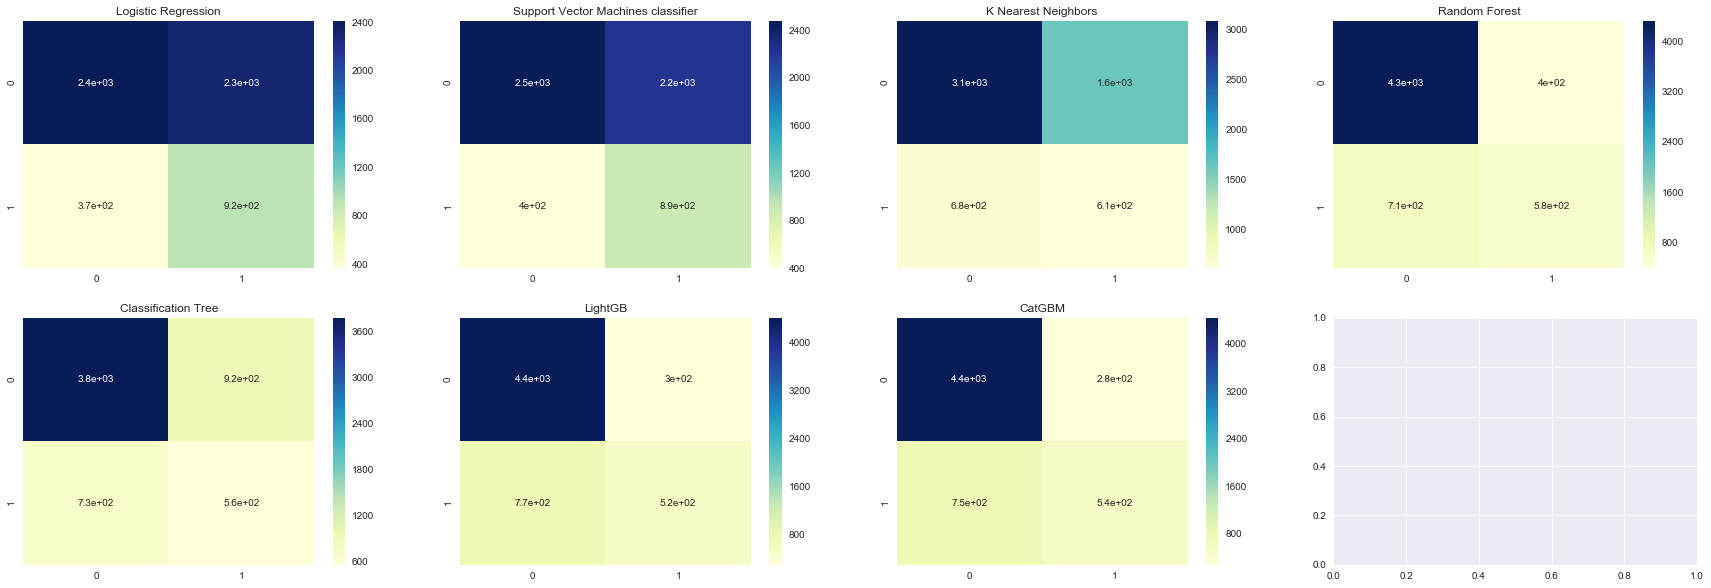

<Figure size 432x288 with 0 Axes>

In [49]:
# Confusion Matrix
cmLR = confusion_matrix(y_test, predLR)
cmSVC = confusion_matrix(y_test, predSVC)
cmKNN = confusion_matrix(y_test, predKNN)
cmRF = confusion_matrix(y_test, predRF)
cmTR = confusion_matrix(y_test, y_pred)
cmLGB = confusion_matrix(y_test, predLGB)
cmCB = confusion_matrix(y_test, predCB)


# Confusion Matrix List
cmList = [cmLR, cmSVC,cmKNN, cmRF,cmTR,  cmLGB, cmCB]
cmTitle = ['Logistic Regression','Support Vector Machines classifier','K Nearest Neighbors','Random Forest',"Classification Tree", 'LightGB','CatGBM', None]
i = 0
plt.figure()
fig, ax = plt.subplots(2,4, num = 6, figsize = (30,10))
for cm in cmList:
    i += 1
    plt.subplot(2,4,i)
    plt.title(cmTitle[i-1])
    sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
plt.show()
plt.savefig('matrix.png');

In [107]:
X.columns

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'SEX_Female', 'SEX_Male',
       'EDUCATION_Graduate School', 'EDUCATION_Other', 'EDUCATION_University',
       'MARRIAGE_Married', 'MARRIAGE_Non-married'],
      dtype='object')

In [108]:
continuous = X.loc[:,['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]


In [109]:
categorical = X.loc[:,['AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6','SEX_Female', 'SEX_Male',
       'EDUCATION_Graduate School', 'EDUCATION_Other', 'EDUCATION_University',
       'MARRIAGE_Married', 'MARRIAGE_Non-married']]

In [110]:
categorical.head()

,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX_Female,SEX_Male,EDUCATION_Graduate School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Non-married
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
m = continuous

In [112]:
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)

In [113]:
continuous = scaler.fit_transform(continuous)

In [114]:
continuous = pd.DataFrame(continuous, columns = m.columns)

In [115]:
continuous.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.010101,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


In [116]:
X = pd.concat([continuous, categorical],axis=1)

C:\Users\brown\Anaconda3\lib\site-packages\pandas\core\indexes\range.py:465: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return self._int64index.union(other)


In [117]:
X.head().T

,0,1,2,3,4
LIMIT_BAL,0.010101,0.111111,0.080808,0.040404,0.040404
BILL_AMT1,0.149982,0.148892,0.172392,0.188100,0.154144
BILL_AMT2,0.069164,0.067858,0.079532,0.111995,0.071601
BILL_AMT3,0.086723,0.087817,0.093789,0.113407,0.106020
BILL_AMT4,0.160138,0.163220,0.173637,0.186809,0.179863
BILL_AMT5,0.080648,0.084074,0.095470,0.109363,0.099633
BILL_AMT6,0.260979,0.263485,0.272928,0.283685,0.275681
PAY_AMT1,0.000000,0.000000,0.001738,0.002290,0.002290
PAY_AMT2,0.000409,0.000594,0.000891,0.001199,0.021779
PAY_AMT3,0.000000,0.001116,0.001116,0.001339,0.011160
